## FP1–V10. Transformator
### Matija Pajas

In [1]:
from scipy import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

#from sympy import *
#init_printing()

from IPython.display import HTML
from IPython.display import display

In [2]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Pokaži/sakrij kod"></form>''')

In [3]:
display(HTML("""
<style>
.output {
    display: block;
    align-items: center;
    text-align: center;
}
td {
  text-align: center;
  vertical-align: middle;
}
</style>
"""))

### Cilj vježbe

Cilj ove vježbe je proučiti svojstva transformatora, te povezati karakteristične veličine koje određuju njegova svojstva sa promjenom nekih veličina. Prvo ću mjeriti struju praznog hoda sa i bez jezgre na primaru. Nakon toga mjeriti ću napon sekundara i promatrati kako se on mijenja i ovisi o broju namotaja zavojnice na sekundaru. Zadnje mjerenje izvodim nad efektivnim strujama primara i sekundara mijenjajući otpor koji je spojen na sekundaru.

### Mjerenje i pokus

Pokus se sastoji od izvora izmjeničnog napona, transformatora, promjenjivog otpornika te nekoliko instrumenata za mjerenje struje i napona. U svrhu lakšeg mjerenja također koristim sklopku kojom naizmjence mogu mjeriti napone na primaru i sekundaru jednim instrumentom. Izvor daje izmjenični napon frekvencije $50 \ \mathrm{Hz}$, a za potrebe ovog pokusa koristimo $2 \ \mathrm{V}$. Transformator se sastoji od dvije zavojnice kojima možemo lako mijenjati broj namotaja spajanjem žica na predefinirane razmake. Zavojnice se nalaze na zajedničkoj feromagnetskoj jezgri, a sam transformator se lako može rastaviti podizanjem zavojnica i micanjem jezgre sa postolja. Otporniku kontinuirano možemo mijenjati otpor $0-100 \ \mathrm{\Omega}$

### Zadatak 1
a) Spojite shemu kao na Slici 6 i dovedite izmjenični napon $U_1 = 2 V$ na primar. Neka broj zavoja bude
maksimalan ($n_1 = 140$). Strujni krug sekundara ostavite otvorenim. Izmjerite struju praznog hoda
$I_{10}$ i napon $U_1$ te odredite samoindukciju zavojnice primara kada je u njoj feromagnetska jezgra.

b) Rastavite jezgru transformatora i skinite zavojnicu s nje. Izmjerite struju i napon na zavojnici kao
u zadatku a) te izračunajte samoindukciju zavojnice bez jezgre.

In [4]:
df = pd.DataFrame([["0,12 $\pm$ 0,1","3,7 $\pm$ 0,1"],["2,7 $\pm$ 0,1","0,97 $\pm$ 0,1",]],
                  index=["$I_{10eff}$ / $\mathrm{A}$","$U_{10eff}$ / $\mathrm{V}$"],columns=["sa jezgrom","bez jezgre"])
#ftohtml = df.to_html(col_space=12, decimal=",")
#rint(dftohtml)

Podaci za zadatke pod (a) i (b) mogu se pronaći u zajedničkoj tablici ispod.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th style="min-width: 12;"></th>
      <th style="min-width: 12;">sa jezgrom</th>
      <th style="min-width: 12;">bez jezgre</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th style="min-width: 12;">$I_{10eff}$ / $\mathrm{A}$</th>
      <td>0,12 $\pm$ 0,1</td>
      <td>3,7 $\pm$ 0,1</td>
    </tr>
    <tr>
      <th style="min-width: 12;">$U_{10eff}$ / $\mathrm{V}$</th>
      <td>2,7 $\pm$ 0,1</td>
      <td>0,927 $\pm$ 0,1</td>
    </tr>
  </tbody>
</table>

Kako bismo odredili samoindukciju zavojnice primara potrebno je malo presložiti izraz (1) iz pripreme:

$$ L_1 = \frac{1}{\omega} \frac{U_1}{I_{10}} = \frac{1}{\omega} \frac{U_{1eff}}{I_{10eff}} $$

a nepouzdanost možemo računati izrazom:

$$M_{L_1} = \frac{1}{\omega} \frac{U_{1eff}}{I_{10eff}} \sqrt{ \frac{ M_{U_{1eff}} ^2 }{U_{1eff} ^2 } + \frac{ M_{I_{10eff}} ^2 }{ I_{10eff} ^2}}$$

Ovdje treba primjetiti da smo u slučaju bez jezgre dobili puno veću struju, a manji napon od $2 \ \mathrm{V}$. Razlog tomu je što je impedancija zavojnice puno manja, zato što je induktivitet puno manji u slučaju bez jezgre. Veći pad napona može se objasniti jednostavnim Ohmovim zakonom. Zavojnica ima svoj omski otpor te je njen pad napona dan sa $U_{zavojnica} = IR_{zavojnica}$, a obzirom da dobivamo veću struju možemo zaključiti da je pad napona na omskom otporu veći kada nema jezgre.

Dobivamo rezultate:

Sa jezgrom: $\ L_1 =( 5,5 \pm 0,5) \times 10^{-2} \ \mathrm{H}   $

Bez jezgre: $\ L_1 =(8,27 \pm 0,09) \times 10^{-4} \ \mathrm{H}   $

In [5]:
d = {"$n_1$": [126,126,126,126,126],
     "$n_2$": [140,126,98,56,28],
     "$I_{10eff}$ / $\mathrm{A}$": [0.18,0.18,0.18,0.18,0.18],
     "$I_{1eff}$ / $\mathrm{A}$": ["-","-","-","-","-"],
     "$I_{2eff}$ / $\mathrm{A}$": [0,0,0,0,0],
     "$U_{1eff}$ / $\mathrm{V}$": [2.08,2.08,2.08,2.08,2.08],
     "$U_{2eff}$ / $\mathrm{V}$": [2.12,1.91,1.48,0.85,0.42]}
df = pd.DataFrame(data=d, index=range(1,6))
#dftohtml = df.to_html(col_space=12,decimal=",")
#print(dftohtml)
means = df.mean(0)
devs = df.std(0)
uncs = devs/sqrt(5)
df2 = pd.DataFrame([(str(means[i]) + " ± " + str(uncs[i])) for i in range(len(means))],index=list(means.keys()),columns=["Iznosi"])
#df

### Zadatak 2

Odaberite napon na primaru $U_1 = 2$ $\mathrm{V}$ i odaberite neki broj zavoja primara $n_1$. Mijenjajte broj zavoja
sekundara $n_2$ i promatrajte napon na sekundaru $U_2$ u praznom hodu. Nacrtajte graf $n_2 − U_2$ i provjerite
relaciju (4).

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th style="min-width: 12;"></th>
      <th style="min-width: 12;">$n_1$</th>
      <th style="min-width: 12;">$n_2$</th>
      <th style="min-width: 12;">$I_{10eff}$ / $\mathrm{A}$</th>
      <th style="min-width: 12;">$I_{1eff}$ / $\mathrm{A}$</th>
      <th style="min-width: 12;">$I_{2eff}$ / $\mathrm{A}$</th>
      <th style="min-width: 12;">$U_{1eff}$ / $\mathrm{V}$</th>
      <th style="min-width: 12;">$U_{2eff}$ / $\mathrm{V}$</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th style="min-width: 12;">1</th>
      <td>126</td>
      <td>140</td>
      <td>0,18</td>
      <td>-</td>
      <td>0</td>
      <td>2,08</td>
      <td>2,12</td>
    </tr>
    <tr>
      <th style="min-width: 12;">2</th>
      <td>126</td>
      <td>126</td>
      <td>0,18</td>
      <td>-</td>
      <td>0</td>
      <td>2,08</td>
      <td>1,91</td>
    </tr>
    <tr>
      <th style="min-width: 12;">3</th>
      <td>126</td>
      <td>98</td>
      <td>0,18</td>
      <td>-</td>
      <td>0</td>
      <td>2,08</td>
      <td>1,48</td>
    </tr>
    <tr>
      <th style="min-width: 12;">4</th>
      <td>126</td>
      <td>56</td>
      <td>0,18</td>
      <td>-</td>
      <td>0</td>
      <td>2,08</td>
      <td>0,85</td>
    </tr>
    <tr>
      <th style="min-width: 12;">5</th>
      <td>126</td>
      <td>28</td>
      <td>0,18</td>
      <td>-</td>
      <td>0</td>
      <td>2,08</td>
      <td>0,42</td>
    </tr>
  </tbody>
</table>

Mjerenja su dana u tablici iznad. U ovom zadatku koristimo se relacijom:

$$ U_2 = -\frac{U_1}{n_1}n_2 $$

gdje možemo prepoznati veličine u odnosu jednadžbe pravca $y = ax + b$ na sljedeći način:

$$y = U_2$$

$$x = n_2$$

$$a = \frac{U_1}{n_1}$$

$$b = 0$$

Ova relacija vrijedi i za kompleksne i efektivne vrijednosti jer će se koeficijenti $\sqrt{2}$ poništiti, ali treba primjetiti kako će nestati minus jer su efektivne vrijednosti uvijek pozitivne.

Metodom najmanjih kvadrata dobivamo:

$a = (1,527 \pm 0,003) \times 10^{-2} \ \mathrm{V} $

$b = (-3 \pm 3) \times 10^{-2} \ \mathrm{V} $

Stvarna vrijednost za $a \approx 1,587 \times 10^{-2} \ \mathrm{V}$ pa možemo vidjeti da je rezultat koji smo dobili u jako dobrom slaganju sa očekivanom vrijednosti. Odsječak na ordinati je jako mali, što znači da ne dolazi do velikog rasipanja magnetskog toka.

In [6]:
#df2

a = 0.015167509479520724 ± 3.4380804987443484e-05
b = -0.0030088495597113685 ± 0.00340353068737773


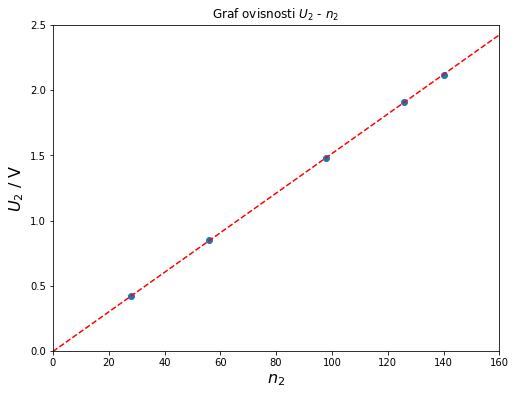

In [7]:
#n2-U2
pars,cov=curve_fit(lambda x,a,b: a*x+b ,d["$n_2$"],d["$U_{2eff}$ / $\mathrm{V}$"] )

a=pars[0]
b=pars[1]

x_fit=linspace(0,200)
y_fit=a*x_fit+b

print("a =", pars[0],"±", sqrt(cov[0,0]))
print("b =",pars[1],"±", sqrt(cov[1,1]))

plt.figure(figsize=(8,6))
plt.scatter(df.iloc[:, [1]],df.iloc[:, [6]])
plt.plot(x_fit,y_fit,color="red",linestyle="--")
plt.xlim(0,160)
plt.ylim(0,2.5)

plt.title("Graf ovisnosti $U_2$ - $n_2$")
plt.xlabel("$n_2$",fontsize=16)
plt.ylabel("$U_2$ / $\mathrm{V}$",fontsize=16);

### Zadatak 3
Odaberite $n_1 = 70$ i $n_2 = 140$ te izmjerite struju praznog hoda $I_{10;eff}$. Tada u strujni krug sekundara
uključite promjenjivi otpornik $R_2$. Mijenjajući $R_2$ promatrajte kako se mijenjaju $I_{1;eff}$ i $I_{2;eff}$. Nacrtajte
graf $I_{2;eff} − I_{1;eff}$ i odredite pravac koji najbolje opisuje mjerene točke. Objasnite značenje odsječka na
ordinati.

In [8]:
d = {"$n_1$": [70,70,70,70,70,70,70,70,70,70,70,70,70],
     "$n_2$": [140,140,140,140,140,140,140,140,140,140,140,140,140],
     "$I_{10eff}$ / $\mathrm{A}$": [0.46,"-","-","-","-","-","-","-","-","-","-","-","-"],
     "$I_{1eff}$ / $\mathrm{A}$": ["-",2.44,1.51,1.11,0.95,0.87,0.82,0.76,0.64,0.53,0.51,0.49,0.48],
     "$I_{2eff}$ / $\mathrm{A}$": [0,1.158,0.649,0.443,0.356,0.311,0.281,0.249,0.199,0.08,0.059,0.046,0.035],
     "$U_{1eff}$ / $\mathrm{V}$": [1.99,1.1,1.4,1.5,1.5,1.6,1.6,1.6,1.7,1.7,1.7,1.7,1.7],
     "$U_{2eff}$ / $\mathrm{V}$": [3.72,2.4,2.1,2.6,2.8,2.9,2.9,3,3.2,3.3,3.4,3.4,3.4]}
df = pd.DataFrame(data=d)
#dftohtml = df.to_html(col_space=12,decimal=",")
#print(dftohtml)
means = df.mean(0)
devs = df.std(0)
uncs = devs/sqrt(5)
df2 = pd.DataFrame([(str(means[i]) + " ± " + str(uncs[i])) for i in range(len(means))],index=list(means.keys()),columns=["Iznosi"])
#df

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th style="min-width: 12;"></th>
      <th style="min-width: 12;">$n_1$</th>
      <th style="min-width: 12;">$n_2$</th>
      <th style="min-width: 12;">$I_{10eff}$ / $\mathrm{A}$</th>
      <th style="min-width: 12;">$I_{1eff}$ / $\mathrm{A}$</th>
      <th style="min-width: 12;">$I_{2eff}$ / $\mathrm{A}$</th>
      <th style="min-width: 12;">$U_{1eff}$ / $\mathrm{V}$</th>
      <th style="min-width: 12;">$U_{2eff}$ / $\mathrm{V}$</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th style="min-width: 12;">0</th>
      <td>70</td>
      <td>140</td>
      <td>0.46</td>
      <td>-</td>
      <td>0,000</td>
      <td>1,99</td>
      <td>3,72</td>
    </tr>
    <tr>
      <th style="min-width: 12;">1</th>
      <td>70</td>
      <td>140</td>
      <td>-</td>
      <td>2.44</td>
      <td>1,158</td>
      <td>1,10</td>
      <td>2,40</td>
    </tr>
    <tr>
      <th style="min-width: 12;">2</th>
      <td>70</td>
      <td>140</td>
      <td>-</td>
      <td>1.51</td>
      <td>0,649</td>
      <td>1,40</td>
      <td>2,10</td>
    </tr>
    <tr>
      <th style="min-width: 12;">3</th>
      <td>70</td>
      <td>140</td>
      <td>-</td>
      <td>1.11</td>
      <td>0,443</td>
      <td>1,50</td>
      <td>2,60</td>
    </tr>
    <tr>
      <th style="min-width: 12;">4</th>
      <td>70</td>
      <td>140</td>
      <td>-</td>
      <td>0.95</td>
      <td>0,356</td>
      <td>1,50</td>
      <td>2,80</td>
    </tr>
    <tr>
      <th style="min-width: 12;">5</th>
      <td>70</td>
      <td>140</td>
      <td>-</td>
      <td>0.87</td>
      <td>0,311</td>
      <td>1,60</td>
      <td>2,90</td>
    </tr>
    <tr>
      <th style="min-width: 12;">6</th>
      <td>70</td>
      <td>140</td>
      <td>-</td>
      <td>0.82</td>
      <td>0,281</td>
      <td>1,60</td>
      <td>2,90</td>
    </tr>
    <tr>
      <th style="min-width: 12;">7</th>
      <td>70</td>
      <td>140</td>
      <td>-</td>
      <td>0.76</td>
      <td>0,249</td>
      <td>1,60</td>
      <td>3,00</td>
    </tr>
    <tr>
      <th style="min-width: 12;">8</th>
      <td>70</td>
      <td>140</td>
      <td>-</td>
      <td>0.64</td>
      <td>0,199</td>
      <td>1,70</td>
      <td>3,20</td>
    </tr>
    <tr>
      <th style="min-width: 12;">9</th>
      <td>70</td>
      <td>140</td>
      <td>-</td>
      <td>0.53</td>
      <td>0,080</td>
      <td>1,70</td>
      <td>3,30</td>
    </tr>
    <tr>
      <th style="min-width: 12;">10</th>
      <td>70</td>
      <td>140</td>
      <td>-</td>
      <td>0.51</td>
      <td>0,059</td>
      <td>1,70</td>
      <td>3,40</td>
    </tr>
    <tr>
      <th style="min-width: 12;">11</th>
      <td>70</td>
      <td>140</td>
      <td>-</td>
      <td>0.49</td>
      <td>0,046</td>
      <td>1,70</td>
      <td>3,40</td>
    </tr>
    <tr>
      <th style="min-width: 12;">12</th>
      <td>70</td>
      <td>140</td>
      <td>-</td>
      <td>0.48</td>
      <td>0,035</td>
      <td>1,70</td>
      <td>3,40</td>
    </tr>
  </tbody>
</table>

U ovom zadatku provjeravamo relaciju:

$$I_1 = I_{10} - \frac{n2}{n1}I_2 $$

gdje prepoznajemo:

$$y = I_1$$

$$x = I_2$$

$$a = \frac{n_2}{n_1}$$

$$b = I_{10}$$

Metodom najmanjih kvadrata računamo pravac oblika $y = ax + b$ te dobivamo:

$a = (1.76 ± 0.04) $

$b = (0.36 ± 0.02) \ \mathrm{A} $

Očekivani a je 2 te možemo vidjeti kako se izračunata vrijednost slaže sa time. Također kao odsječak na sori ordinata uspjeli smo dobiti približnu vrijednost struje praznog hoda koja je izmjerena $I_{10} = 0.46 \ \mathrm{A}$

In [9]:
#df2

a = 1.7569095699358317 ± 0.04391206386681098
b = 0.3598156334428704 ± 0.019538220443450216


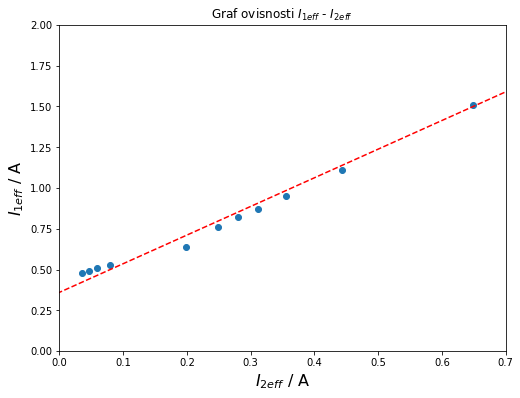

In [10]:
#I1-I2


pars,cov=curve_fit(lambda x,a,b: a*x+b,d["$I_{2eff}$ / $\mathrm{A}$"][1:],d["$I_{1eff}$ / $\mathrm{A}$"][1:] )

a=pars[0]
b=pars[1]

x_fit=linspace(-5,5)
y_fit=a*x_fit+b

print("a =", pars[0],"±", sqrt(cov[0,0]))
print("b =",pars[1],"±", sqrt(cov[1,1]))

plt.figure(figsize=(8,6))
plt.scatter(df.iloc[1:, [4]],df.iloc[1:, [3]])
plt.plot(x_fit,y_fit,color="red",linestyle="--")
plt.xlim(0,0.7)
plt.ylim(0,2)

plt.title("Graf ovisnosti $I_{1eff}$ - $I_{2eff}$")
plt.xlabel("$I_{2eff}$ / $\mathrm{A}$",fontsize=16)
plt.ylabel("$I_{1eff}$ / $\mathrm{A}$",fontsize=16);

### Zaključak

Nakon što smo dokazali da ovisnost napona sekundara o broju namotaja zavojnice na sekundaru, te da se ovisnosti struja na primaru i sekundaru slažu sa teoretskim predviđanjima za idealni transformator možemo zaključiti da je to dovoljno dobra aproksimacija i za realni transformator.